## Display System

IPython's Rich Display System
In Python, objects can declare their textual representation using the __repr__ method. IPython expands on this idea and allows objects to declare other, richer representations including:
- HTML
- JSON
- PNG
- JPEG
- SVG
- LaTeX

*(https://nbviewer.jupyter.org)*

Class methods that Jupyter/Ipyton will use depending on display representation

- `_repr_html_:` return raw HTML as a string, or a tuple (see below).
- `_repr_json_:` return a JSONable dict, or a tuple (see below).
- `_repr_jpeg_:` return raw JPEG data, or a tuple (see below).
- `_repr_png_:` return raw PNG data, or a tuple (see below).
- `_repr_svg_:` return raw SVG data as a string, or a tuple (see below).
- `_repr_latex_:` return LaTeX commands in a string surrounded by “$”,
or a tuple (see below).
- `_repr_mimebundle_:` return a full mimebundle containing the mapping
from all mimetypes to data. Use this for any mime-type not listed above.


- interactive function
- nbconvert for html

** notebook uses JQuery and Backbone.js and require.js   **

### Image

In [2]:
from IPython.display import Image
Image(url='https://mote.org/media/uploads/images/_gallery_full/022-Rotund_Florida_Manatee_copy.jpg')

### IFrame

In [1]:
from IPython.display import IFrame
wiki = IFrame('https://en.wikipedia.org/wiki/Manatee?useformat=mobile', width='100%', height=350)
wiki

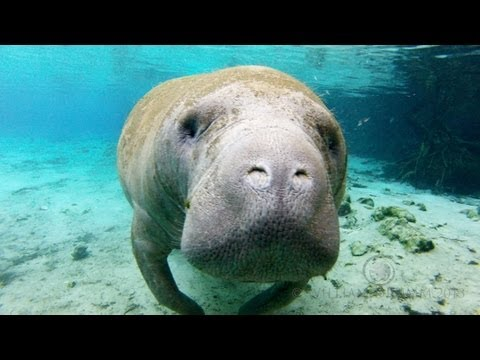

In [2]:
from IPython.display import YouTubeVideo
yv = YouTubeVideo('_AvjXSEWBXk')
yv

## HTML

In [3]:
from IPython.display import HTML
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""
s = HTML(s)
s

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


## Widgets
---

### Interact

https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets.

Its also a good way to demonstrate and play with functions.



In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, DOMWidget
import ipywidgets as widgets

In [6]:
def f(fruit, like, how_much):
    l = 'like' if like else 'dislike'
    return "I %s like %s this much: %d" % (l, fruit, how_much)

In [7]:
interact(f, fruit=['apples','oranges','kiwi','bananas'], like=True, how_much=5);

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZnJ1aXQnLCBvcHRpb25zPSgnYXBwbGVzJywgJ29yYW5nZXMnLCAna2l3aScsICdiYW5hbmFzJyksIHZhbHVlPSfigKY=


### Dynamic Widgets

In [12]:
from traitlets import Unicode, validate
class HelloWidget(widgets.DOMWidget):
    # boilerplate
    _view_name = Unicode('HelloView').tag(sync=True)
    _view_module = Unicode('hello').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)
    # 'value' is synchronized with the DOM
    value = Unicode('Hello World!').tag(sync=True)

In [13]:
%%javascript
require.undef('hello');

define('hello', ["@jupyter-widgets/base"], function(widgets) {

    var HelloView = widgets.DOMWidgetView.extend({

        render: function() {
            this.value_changed();
            this.model.on('change:value', this.value_changed, this);
        },

        value_changed: function() {
            this.el.textContent = this.model.get('value');
        },
    });

    return {
        HelloView : HelloView
    };
});

<IPython.core.display.Javascript object>

In [14]:
w = HelloWidget()
w

HelloWidget()

In [15]:
w.value = 'test5'

## Web frameworks and tools
---

### Three.js
This exmaple shows a python binding for Three.js, a javascript 3D rendering tool. This same thing could be done directly in javascript

In [16]:
from pythreejs import *
import numpy as np
from IPython.display import display
from ipywidgets import HTML, Text, Output, VBox
from traitlets import link, dlink

Define a shape via a javascript parametric function

In [17]:
f = """
function f(origu, origv, out) {
    // scale u and v to the ranges I want: [0, 2*pi]
    var u = 2*Math.PI*origu;
    var v = 2*Math.PI*origv;
    
    var x = Math.sin(u);
    var y = Math.cos(v);
    var z = Math.cos(u+v);
    
    out.set(x,y,z)
}
"""

Use the python binding for Three.js to render

In [19]:
surf_g = ParametricGeometry(func=f, slices=16, stacks=16);

surf = Mesh(geometry=surf_g, material=MeshLambertMaterial(color='red', side='FrontSide'))
surf2 = Mesh(geometry=surf_g, material=MeshLambertMaterial(color='yellow', side='BackSide'))
c = PerspectiveCamera(position=[5, 5, 3], up=[0, 0, 1],
                      children=[DirectionalLight(color='white',
                                                 position=[3, 5, 1],
                                                 intensity=0.6)])
scene = Scene(children=[surf, surf2, c, AmbientLight(intensity=0.5)])
renderer = Renderer(camera=c, scene=scene, controls=[OrbitControls(controlling=c)], width=400, height=400)
display(renderer)

UmVuZGVyZXIoY2FtZXJhPVBlcnNwZWN0aXZlQ2FtZXJhKGNoaWxkcmVuPShEaXJlY3Rpb25hbExpZ2h0KGNvbG9yPSd3aGl0ZScsIGludGVuc2l0eT0wLjYsIHBvc2l0aW9uPSgzLjAsIDUuMCzigKY=
